In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [2]:
adult=pd.read_csv('../datasets/adult.csv')
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [3]:
df=adult[['occupation','workclass','education','sex','capital-gain']]

In [4]:
df

,occupation,workclass,education,sex,capital-gain
0,Adm-clerical,State-gov,Bachelors,Male,2174
1,Exec-managerial,Self-emp-not-inc,Bachelors,Male,0
2,Handlers-cleaners,Private,HS-grad,Male,0
3,Handlers-cleaners,Private,11th,Male,0
4,Prof-specialty,Private,Bachelors,Female,0
5,Exec-managerial,Private,Masters,Female,0
6,Other-service,Private,9th,Female,0
7,Exec-managerial,Self-emp-not-inc,HS-grad,Male,0
8,Prof-specialty,Private,Masters,Female,14084
9,Exec-managerial,Private,Bachelors,Male,5178


In [18]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [33]:
df.occupation_dummies.fillna('Missing occupation', inplace=True)
occupation_dummies=pd.get_dummies(df.occupation)

AttributeError: 'DataFrame' object has no attribute 'occupation_dummies'

In [7]:
df.workclass.fillna('Missing work class', inplace=True)
df.workclass.value_counts()

/home/ali/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Private               33906
Self-emp-not-inc       3862
Local-gov              3136
Missing work class     2799
State-gov              1981
Self-emp-inc           1695
Federal-gov            1432
Without-pay              21
Never-worked             10
Name: workclass, dtype: int64

In [8]:
def work_baby_work(job_class):
    if job_class == 'Private':
        return 'private'
    elif 'Self-emp' in job_class:
        return "self_employed"
    elif '-gov' in job_class:
        return "government"
    else:
        return "no_job"
print work_baby_work('Self-emp-not-inc')

self_employed


In [9]:
work_class_binned=df.workclass.apply(work_baby_work)
work_class_binned=pd.get_dummies(work_class_binned)
work_class_binned.head()

,government,no_job,private,self_employed
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0


In [10]:
df.education.fillna('Missing education', inplace=True)
df.education.value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [11]:
def education_binner(schooling):
    if schooling=='HS-grad':
        return 'hs_grad'
    elif schooling in ['Some-college', 'Bachelors']:
        return 'college'
    elif schooling in ['Assoc-voc', 'Assoc-acdm', 'Prof-school']:
        return 'alt_education'
    elif schooling in ['Masters', 'Doctorate']:
        return 'grad_school'
    else:
        return 'lower_than_hs'

In [12]:
print education_binner('HS-grad')
print education_binner('Some-college')
print education_binner('Masters')

hs_grad
college
grad_school


In [13]:
education_binned=df.education.apply(education_binner)
education_binned=pd.get_dummies(education_binned)
education_binned.head()

,alt_education,college,grad_school,hs_grad,lower_than_hs
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


In [14]:
df.sex.value_counts()
df['is_male'] = df.sex.apply(lambda x: 1 if x=='Male' else 0)

/home/ali/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [49]:
final_df=df[['capital-gain', 'is_male']]
final_df=final_df.join(occupation_dummies)
final_df=final_df.join(work_class_binned)
final_df=final_df.join(education_binned)

In [50]:
def plot_graph(x, y):
    plt.scatter(x, y)
    plt.show()

In [51]:
y=adult.income.apply(lambda x: 0 if x=='small' else 1)

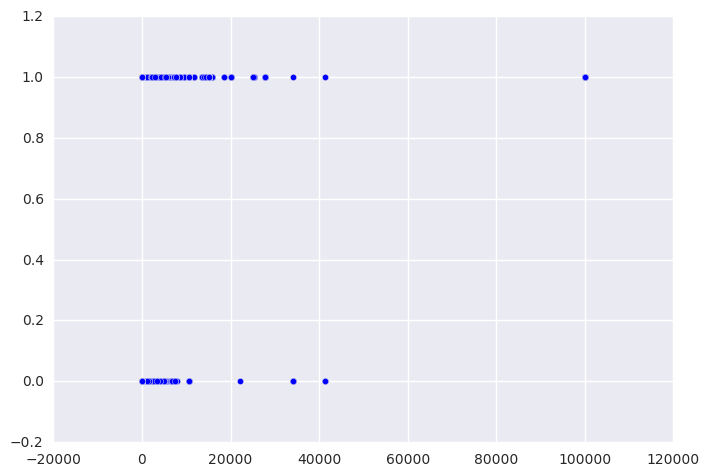

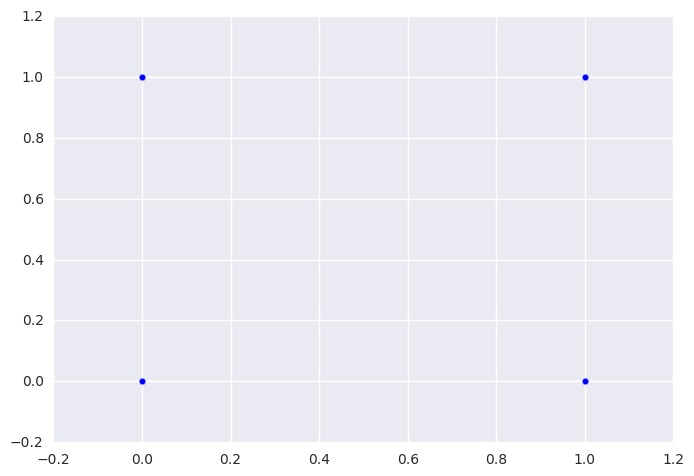

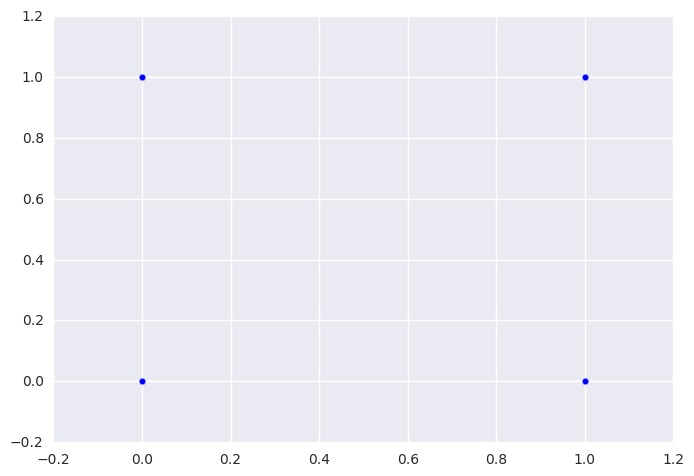

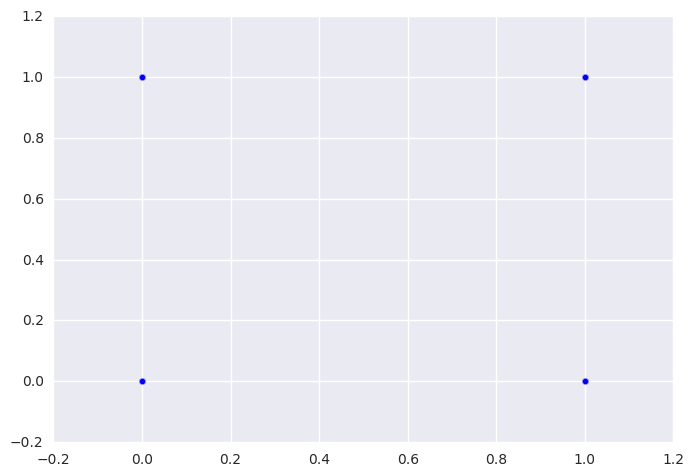

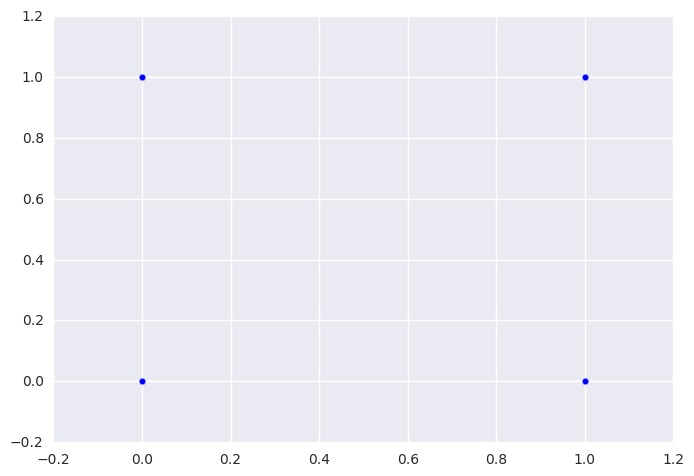

In [52]:
for x in final_df.columns[0:5]:
    plot_graph(final_df[x], y)

In [53]:
import seaborn as sns

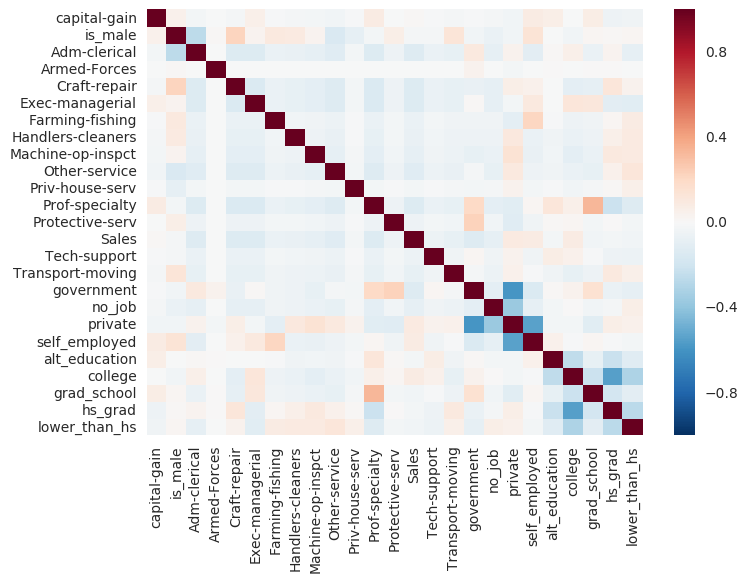

In [54]:
sns.heatmap(final_df.corr())

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [56]:
x=StandardScaler().fit_transform(final_df)
x.shape

(48842, 25)

In [57]:
kmeans=KMeans(2)

In [58]:
kmeans.fit(x)
predictions=kmeans.predict(x)

In [59]:
final_df=final_df.join(pd.DataFrame(predictions, columns=['two_class']))
final_df.head()

,capital-gain,is_male,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,...,government,no_job,private,self_employed,alt_education,college,grad_school,hs_grad,lower_than_hs,two_class
0,2174,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1
2,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [60]:
final_df.groupby('two_class')[['alt_education', 'college', 'grad_school', 'hs_grad', 'lower_than_hs']]

In [45]:
kmeans = KMeans(3)
kmeans.fit(x)
predictions=kmeans.predict(x)

In [46]:
final_df=final_df.join(pd.DataFrame(predictions, columns=['three_class']))
final_df.head()

AttributeError: Cannot access callable attribute 'join' of 'DataFrameGroupBy' objects, try using the 'apply' method